# Estocastic and batch training
- Estocasting training only use 1 x and y value to train
- Batch training use a whole set of values to traing and then calculate the avg loss value

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
session = tf.Session()

In [12]:
batch_size = 25

In [27]:
x_vals = np.random.normal(1.0, 0.1, 200)
y_vals = np.repeat(10.0, 200)

In [45]:
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))

In [46]:
my_prediction = tf.matmul(x_data, A)

In [47]:
loss = tf.reduce_mean(tf.square(my_prediction-y_target))

In [54]:
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.025)
train_step = my_optimizer.minimize(loss)

In [55]:
init = tf.global_variables_initializer()

In [56]:
session.run(init)

In [57]:
loss_batch = []
for i in range(200):
    rand_index = np.random.choice(200, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #'+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss: '+str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A=[[0.90794456]]
Loss: 81.94797
Step #10 A=[[2.970751]]
Loss: 49.319023
Step #15 A=[[4.5638695]]
Loss: 28.583061
Step #20 A=[[5.786809]]
Loss: 18.255165
Step #25 A=[[6.724918]]
Loss: 9.988398
Step #30 A=[[7.4496427]]
Loss: 7.254785
Step #35 A=[[8.00907]]
Loss: 4.1743727
Step #40 A=[[8.447084]]
Loss: 2.338336
Step #45 A=[[8.782418]]
Loss: 2.2881947
Step #50 A=[[9.048445]]
Loss: 1.7330033
Step #55 A=[[9.260737]]
Loss: 1.0730618
Step #60 A=[[9.410434]]
Loss: 1.4479009
Step #65 A=[[9.514812]]
Loss: 1.1124108
Step #70 A=[[9.617455]]
Loss: 0.73345435
Step #75 A=[[9.71294]]
Loss: 1.3599238
Step #80 A=[[9.773152]]
Loss: 1.2620502
Step #85 A=[[9.785581]]
Loss: 0.8831496
Step #90 A=[[9.810827]]
Loss: 0.6769879
Step #95 A=[[9.814248]]
Loss: 0.8485192
Step #100 A=[[9.807642]]
Loss: 1.1353958
Step #105 A=[[9.823105]]
Loss: 1.3262204
Step #110 A=[[9.842052]]
Loss: 0.6584841
Step #115 A=[[9.856147]]
Loss: 0.6530171
Step #120 A=[[9.838078]]
Loss: 0.8358647
Step #125 A=[[9.850542]]
Loss: 1.2296

In [51]:
loss_stochastic = []
for i in range(200):
    rand_index = np.random.choice(200, size = 1)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #'+str(i+1)+' A='+str(session.run(A)))
        temp_loss = session.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss: '+str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A=[[1.5805705]]
Loss: 69.35426
Step #10 A=[[3.511569]]
Loss: 40.584328
Step #15 A=[[4.9816093]]
Loss: 27.666304
Step #20 A=[[6.116386]]
Loss: 17.790562
Step #25 A=[[6.978629]]
Loss: 8.676601
Step #30 A=[[7.609081]]
Loss: 1.9906714
Step #35 A=[[8.168152]]
Loss: 4.337432
Step #40 A=[[8.489441]]
Loss: 4.858144
Step #45 A=[[8.909059]]
Loss: 2.3735125
Step #50 A=[[9.146608]]
Loss: 0.28935486
Step #55 A=[[9.243301]]
Loss: 0.77218115
Step #60 A=[[9.419549]]
Loss: 3.0904613
Step #65 A=[[9.404886]]
Loss: 0.7700172
Step #70 A=[[9.395369]]
Loss: 0.03525789
Step #75 A=[[9.472127]]
Loss: 0.156717
Step #80 A=[[9.623859]]
Loss: 0.32533467
Step #85 A=[[9.661588]]
Loss: 0.19930078
Step #90 A=[[9.664193]]
Loss: 1.7607408
Step #95 A=[[9.484711]]
Loss: 0.3915148
Step #100 A=[[9.575067]]
Loss: 1.6674182
Step #105 A=[[9.534206]]
Loss: 1.4911175
Step #110 A=[[9.679653]]
Loss: 0.29998356
Step #115 A=[[9.788128]]
Loss: 0.5466995
Step #120 A=[[9.787767]]
Loss: 0.08708808
Step #125 A=[[9.799367]]
Loss: 0

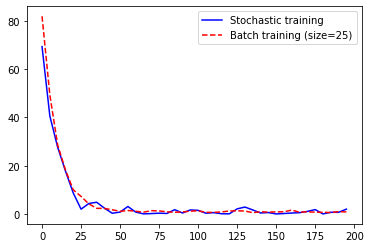

In [58]:
plt.plot(range(0,200,5), loss_stochastic, 'b-', label = 'Stochastic training')
plt.plot(range(0,200,5), loss_batch, 'r--', label = 'Batch training (size=25)')
plt.legend(loc='upper right', prop={'size' : 10})
plt.show()

## Conclutions

### - Batch training
- Batch training it's a faster-convergence algorithm. It takes less iterations compared to Stochastic type.
- It uses a lots of computational resources
- The curve is smoother
### - Stochastic training
- When the iteration number is high, the loss value is not smooth, tends to generate spikes
- Fits for problems were the global minimum is hard to find. Then the random process allow to converge to it.

